# Historical data from Flight Radar 14 from 2021 07 24

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

file_hist = 'hist.csv'

Unique destination countries:

Unique origin countries:
182057


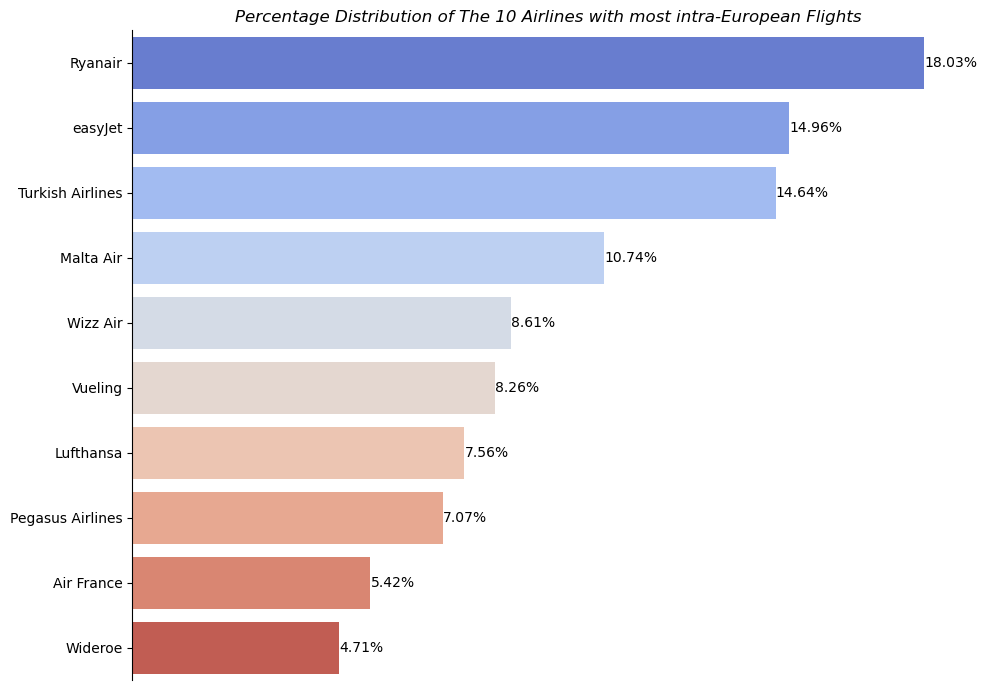

        flight callsign operator_icao                      operator_name  \
0        AIB24    RDF24           RDF                                NaN   
1          NaN    AFM01           NaN                                NaN   
2          NaN    OKBYR           NaN                                NaN   
3          NaN    HBZYF           NaN                                NaN   
4      DFL5995  DFL5995           DFL  Babcock Scandinavian AirAmbulance   
...        ...      ...           ...                                ...   
24600   FR5613  RYS5613           RYS                               Buzz   
24601    TK387   THY8TM           THY                   Turkish Airlines   
24602  NPT1403   NPT10K           NPT                      West Atlantic   
24603      NaN      NaN           DOC                                NaN   
24604      NaN    YUPZM           PNK                            AirPink   

      airline_icao                       airline_name equipment registration  \
0      

In [2]:
df = pd.read_csv(file_hist)

unique_destination_countries = df['destination_country'].unique()
unique_origin_countries = df['origin_country'].unique()

print("Unique destination countries:")
#print(len(unique_destination_countries))
#print(unique_destination_countries)

print("\nUnique origin countries:")
#print(len(unique_origin_countries))
#print(unique_origin_countries)

print(len(df))

countries_in_europe = ['SWITZERLAND', 'GERMANY', 'FRANCE', 'CZECHIA', 'FINLAND',
 'UNITED KINGDOM', 'TURKEY', 'POLAND', 'CYPRUS', 'SWEDEN', 'LUXEMBOURG', 'SPAIN', 'AUSTRIA',
 'NETHERLANDS', 'AZERBAIJAN', 'UKRAINE', 'IRELAND', 'ITALY', 'GEORGIA', 'ALBANIA', 'BELGIUM',
 'BELARUS', 'CROATIA', 'SLOVAKIA', 'BULGARIA', 'PORTUGAL', 'DENMARK',
 'ICELAND', 'LATVIA', 'NORWAY', 'GREECE', 'KOSOVO', 'NORTH MACEDONIA', 'SERBIA',
 'ROMANIA', 'LITHUANIA', 'MOLDOVA', 'ESTONIA',
 'MALTA', 'HUNGARY', 'SLOVENIA', 'BOSNIA AND HERZEGOVINA', 'MONACO', 'MONTENEGRO']

df = df[df['origin_country'].isin(countries_in_europe) & df['destination_country'].isin(countries_in_europe)]

df.reset_index(drop=True, inplace=True)

df['operator_name'] = df['operator_name'].replace('easyJet Europe', 'easyJet')

top_10_operator_counts = df['operator_name'].value_counts().nlargest(10)
top_10_operator_names = top_10_operator_counts.index
df_top_10 = df[df['operator_name'].isin(top_10_operator_names)]

# Calculate the percentage of each category within the top 10
percentage_counts = df_top_10['operator_name'].value_counts(normalize=True) * 100

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x=percentage_counts.values, y=percentage_counts.index, palette='coolwarm')

# Annotate the bars with percentages
for index, value in enumerate(percentage_counts.values):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Labeling and styling the plot
plt.title('Percentage Distribution of The 10 Airlines with most intra-European Flights', fontstyle='italic')
plt.ylabel("")
plt.grid(False)
plt.gca().axes.get_xaxis().set_visible(False)
sns.despine(bottom=True)
plt.tight_layout()
plt.show()

print(df)

The percentage of fligts over 130 mins is:
20.192590723686976


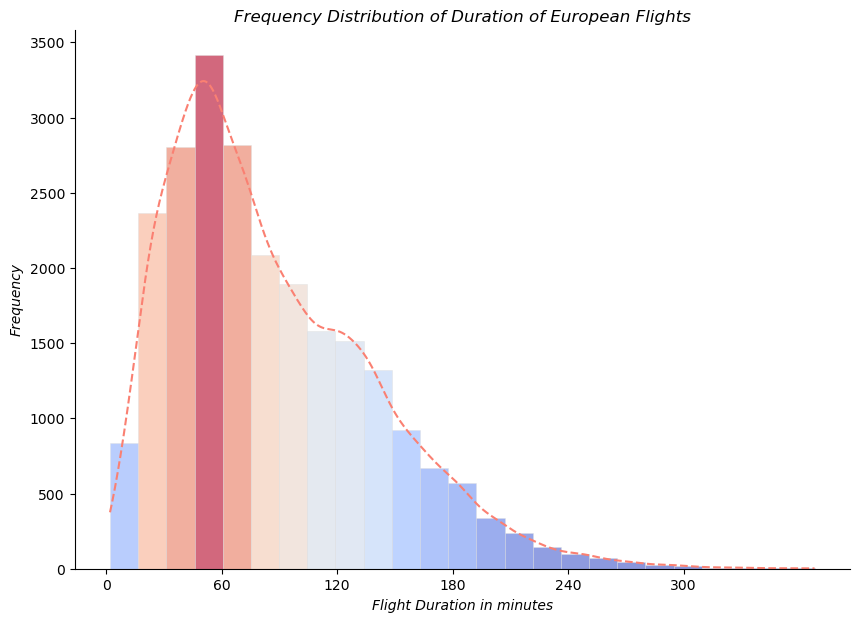

In [3]:
df['flight_time'] = pd.to_datetime(df['flight_time'], format='%H:%M')

# Convert 'flight_time' to total minutes
df['total_minutes'] = df['flight_time'].dt.hour * 60 + df['flight_time'].dt.minute
df = df[df['total_minutes'] <= 400]

plt.figure(figsize=(10, 7))
n, bins, patches = plt.hist(df['total_minutes'], bins = 25, edgecolor='#e0e0e0', linewidth = 0.5, alpha=0.6,)

kde = gaussian_kde(df['total_minutes'])
x_vals = np.linspace(min(df['total_minutes']), max(df['total_minutes']), 1000)
y_vals = kde(x_vals)

# Normalize KDE to match the histogram's scale
bin_width = bins[1] - bins[0]

# Scale the KDE values by the bin width to match the histogram scale
y_vals *= bin_width * len(df['total_minutes'])

# Plot the KDE line of best fit
plt.plot(x_vals, y_vals, color='salmon', linestyle='--')

for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.coolwarm(n[i]/max(n)))

plt.xticks([0, 60, 120, 180, 240, 300]) 

ax = plt.gca()

# Remove the right and upper borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set labels and title
plt.xlabel('Flight Duration in minutes', fontstyle='italic')
plt.ylabel('Frequency', fontstyle='italic')
plt.title('Frequency Distribution of Duration of European Flights', fontstyle='italic')

count_over_130 = df[df['total_minutes'] > 130].shape[0]
total_count = df.shape[0]
percentage_over_130 = (count_over_130 / total_count) * 100

print('The percentage of fligts over 130 mins is:')
print(percentage_over_130)

# Show the plot
plt.show()

# Source And Destination Analysis

In [4]:
top_5_src = df['origin_name'].value_counts().nlargest(5)
top_5_dest = df['destination_name'].value_counts().nlargest(5)

top_5_src_cty = df['origin_city'].value_counts().nlargest(5)
top_5_dest_cty = df['destination_city'].value_counts().nlargest(5)

top_5_src_ctr = df['origin_country'].value_counts().nlargest(5)
top_5_dest_ctr = df['destination_country'].value_counts().nlargest(5)

print("The top 5 busiest departure airports are: ")
print(top_5_src)
print(top_5_dest)
print("The top 5 busiest departure cities are: ")
print(top_5_src_cty)
print(top_5_dest_cty)
print("The top 5 busiest departure cities are: ")
print(top_5_src_ctr)
print(top_5_dest_ctr)

count_df = df.groupby(['origin_name', 'destination_name']).size().reset_index(name='count')

# Sort by 'count' in descending order to find the most common instances
sorted_count_df = count_df.sort_values(by='count', ascending=False)

# Get the top 10 most common instances
top_10_instances = sorted_count_df.head(10)


The top 5 busiest departure airports are: 
origin_name
Amsterdam Schiphol Airport         439
Palma de Mallorca Airport          391
Frankfurt Airport                  367
Paris Charles de Gaulle Airport    359
Barcelona El Prat Airport          339
Name: count, dtype: int64
destination_name
Amsterdam Schiphol Airport    442
Palma de Mallorca Airport     386
Frankfurt Airport             377
Barcelona El Prat Airport     350
Madrid Barajas Airport        344
Name: count, dtype: int64
The top 5 busiest departure cities are: 
origin_city
London       758
Paris        688
Istanbul     575
Milan        486
Frankfurt    460
Name: count, dtype: int64
destination_city
London       741
Paris        639
Istanbul     576
Milan        485
Frankfurt    461
Name: count, dtype: int64
The top 5 busiest departure cities are: 
origin_country
GERMANY           2871
SPAIN             2707
UNITED KINGDOM    2680
FRANCE            2412
ITALY             2143
Name: count, dtype: int64
destination_country
GE